# Guide to generate_contour_data.py and make_plot.py

This is a guide to generate_contour_data.py and make_plot.py, the two main codes used in BOWIE, Binary Observability With Illustrative Exploration. For full documentation see https://mikekatz04.github.io/BOWIE/. 

Please refer to and cite "Evaluating Black Hole Detectability with LISA" (arXiv:1807.02511) for usage of this tool and an example of its application. The codes here are shared under the GNU license. 

In [1]:
import os
from gwsnrcalc.generate_contour_data import generate_contour_data
from gwsnrcalc.genconutils.forminput import MainContainer as GenInput
from bowie_makeplot.make_plot import plot_main
from bowie_makeplot.plotutils.forminput import MainContainer as PlotInput
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## generate_contour_data.py

``generate_contour_Data.py`` generates gridded data with specified parameters of binary black holes for x and y, and signal-to-noise ratio (SNR) for z. The SNR is calculated by inputing as many sensitivity curves (as txt files) as desired. Output can be in .txt or compressed .hdf5 for larger files.

### Inputs

- Set of Binary Parameters
- Set of Sensitivity Curves

### Outputs

- File of gridded SNR values

## make_plot.py

``make_plot.py`` is a tool for gravitational wave analysis. It was originally designed for the LISA gravitational wave mission, but has broad applications. It provides a gridded array of plots for comparisons of sensitivity curves and/or binary parameters. This guide will walk you through basic examples for this code.

### Generic Inputs

``make_plot.py`` takes, as an input, a gridded data set with columns representing the x values, y values, and z values. For this particular application, and throughout the guide, the z value will be the signal-to-noise ratio (SNR), but the tool itself is generic to whatever z value the user prefers. This input is from of a file (like the output from ``generate_contour_data.py``).

### Basic Outputs

``make_plot.py`` outputs three different plots. In the following sections, I will introduce the three plots: Waterfall, Ratio, and Horizon.

Waterfall: 
		SNR contour plot based on plots from LISA Mission proposal.

Ratio:
    Comparison plot of the ratio of SNRs for two different inputs. This plot also contains Loss/Gain contours, which describe when sources are gained or lost compared to one another based on a user specified SNR cut. See paper above for further explanation. 

Horizon:
    SNR contour plots comparing multipile inputs. User can specify contour value. The default is the user specified SNR cut.

# Example 1

Generate Data for Plot 1: generate a 100x100 grid of source frame total mass [$10^2M_\odot$, $10^8M_\odot$] and redshift [$10^{-2}$, $10^2$] for the full waveform through inspiral, merger, and ringdown starting one year before merger. Fix the mass ratio to 1/2. Use different spins of 0.8 for $m_1$ and 0.6 for $m_2$. This plot will only need one sensitivity curve. We will use the Proposed LISA sensitivity (arXiv: 1702.00786) without the Galactic background. We will output to an hdf5 file. We will generate in parallel. We use ``verbose=3`` to find out when 3 parallel process have finished. 

In [3]:
generate_plot_1 = GenInput(print_input=True)

# main inputs
generate_plot_1.set_signal_type('all')
generate_plot_1.set_generation_type(num_processors=-1, verbose=3)
generate_plot_1.set_wd_noise(False)

# output_info
generate_plot_1.set_output_file('./example_data/plot_1_data.hdf5')
generate_plot_1.set_x_col_name('M_s')
generate_plot_1.set_y_col_name('z')

# add a note that there is no white dwarf noise
generate_plot_1.add_note("No white dwarf noise.")

# input sensitivity info
generate_plot_1.add_noise_curve('PL', noise_type='ASD')

# generation info
generate_plot_1.set_x_grid_info(1e2, 1e10, 100, 'log', 'total_mass')
generate_plot_1.set_y_grid_info(1e-2, 1e2, 100, 'log', 'redshift')

generate_plot_1.add_fixed_parameter(0.5, 'mass_ratio')
generate_plot_1.add_fixed_parameter(0.8, 'spin_1')
generate_plot_1.add_fixed_parameter(0.6, 'spin_2')
generate_plot_1.add_fixed_parameter(1.0, 'start_time')
generate_plot_1.add_fixed_parameter(0.0, 'end_time')

# add LISA averaging factor
generate_plot_1.set_snr_prefactor(np.sqrt(2.*16./5.))


generate_contour_data(generate_plot_1)

{'sensitivity_input': {'sensitivity_curves': ['PL'], 'add_wd_noise': 'False', 'noise_type_in': ['ASD']}, 'snr_input': {'prefactor': 2.5298221281347035, 'signal_type': ['all']}, 'output_info': {'y_col_name': 'z', 'added_note': 'No white dwarf noise.', 'output_file_name': './example_data/plot_1_data.hdf5', 'x_col_name': 'M_s'}, 'generate_info': {'mass_ratio': 0.5, 'x_high': 10000000000.0, 'yval_name': 'redshift', 'yscale': 'log', 'y_low': 0.01, 'spin_1': 0.8, 'start_time': 1.0, 'num_y': 100, 'y_high': 100.0, 'xscale': 'log', 'x_low': 100.0, 'end_time': 0.0, 'xval_name': 'total_mass', 'num_x': 100, 'spin_2': 0.6}, 'general': {}, 'parallel_input': {'verbose': 3, 'num_processors': -1, 'num_splits': 1000}}
start pool with 4 processors: 10 total processes.

Process  3 is finished.
Process  6 is finished.
Process  9 is finished.
outputing file: ././example_data/plot_1_data.hdf5
11.400672912597656


The waterfall plot is a general filled contour plot. You can define values for the contours, but there are default values shown in the plot below. These plots resemble figure 3 in the LISA Mission Proposal.

{'figure': {'fig_x_label_kwargs': {'rotation': 'vertical', 'va': 'center', 'fontsize': 20}, 'fig_x_label_x': 0.01, 'fig_x_label_y': 0.51, 'fig_y_label_y': 0.02, 'fig_y_label_kwargs': {'rotation': 'horizontal', 'fontsize': 20, 'ha': 'center'}, 'fig_y_label_x': 0.45, 'fig_y_label': 'Redshift', 'figure_width': 10.0, 'fig_x_label': 'Total Mass ($M_\\odot$)', 'figure_height': 7.0}, 'general': {'num_cols': 1, 'sharex': True, 'sharey': True, 'yscale': 'lin', 'xlims': [2.0, 10.0], 'ylims': [0.0, 20.0], 'y_column_label': 'z', 'x_tick_label_fontsize': 16, 'x_column_label': 'M_s', 'dx': 1.0, 'file_name': 'plot_1_data.hdf5', 'num_rows': 1, 'y_tick_label_fontsize': 16, 'dy': 4.0, 'WORKING_DIRECTORY': 'example_data', 'xscale': 'log'}, 'plot_info': {'0': {'extra': {}, 'file': [{'label': 'PL_all'}], 'limits': {}, 'label': {}, 'legend': {}, 'plot_type': 'Waterfall'}}}


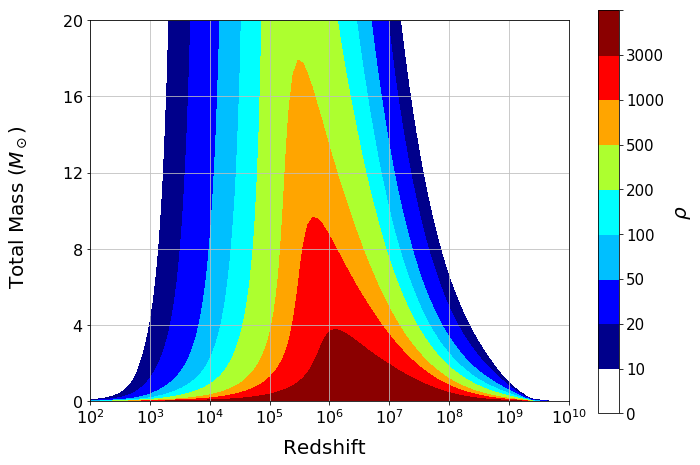

In [4]:
waterfall = PlotInput(1, 1, print_input=True)

# set general info
waterfall.set_working_directory("example_data")
waterfall.set_all_file_column_labels(xlabel='M_s', ylabel='z')
waterfall.set_fig_size(10.0, 7.0)
waterfall.set_all_xlims([2.0, 10.0], 1.0, 'log', fontsize=16)
waterfall.set_all_ylims([0.0, 20.0], 4.0, 'lin', fontsize=16)
waterfall.set_fig_y_label(ylabel="Redshift")
waterfall.set_fig_x_label(xlabel=r"Total Mass ($M_\odot$)")
waterfall.set_all_file_name("plot_1_data.hdf5")

# set plot_info
waterfall.ax.set_plot_type('Waterfall')
waterfall.ax.add_dataset(label="PL_all")

plot_main(waterfall)

**Note**: The printed dictionary prior to the plot can also be supplied if you prefer using a dictionary rather than with class methods. Here it is below. (Same goes for generating data.)

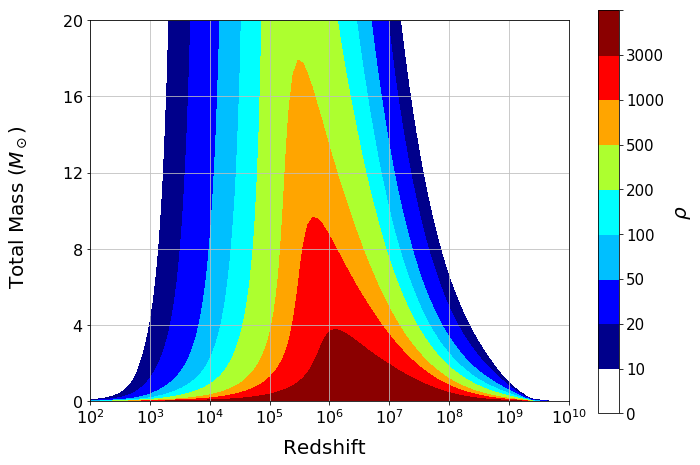

In [5]:
waterfall_dict = {
  'figure': 
    {'fig_y_label_y': 0.02,
     'fig_x_label': 'Total Mass ($M_\\odot$)',
     'fig_y_label_kwargs': {'fontsize': 20, 'rotation': 'horizontal', 'ha': 'center'},
     'fig_y_label_x': 0.45,
     'figure_height': 7.0,
     'figure_width': 10.0,
     'fig_y_label': 'Redshift',
     'fig_x_label_y': 0.51,
     'fig_x_label_x': 0.01,
     'fig_x_label_kwargs': {'fontsize': 20, 'rotation': 'vertical', 'va': 'center'}
    }, 
 'general': 
    {'y_column_label': 'z',
     'dx': 1.0,
     'num_rows': 1,
     'xlims': [2.0, 10.0],
     'file_name': 'plot_1_data.hdf5',
     'WORKING_DIRECTORY': 'example_data',
     'yscale': 'lin',
     'sharey': True,
     'num_cols': 1,
     'xscale': 'log',
     'dy': 4.0,
     'sharex': True, 
     'x_tick_label_fontsize': 16,
     'ylims': [0.0, 20.0],
     'x_column_label': 'M_s',
     'y_tick_label_fontsize': 16
    }, 
 'plot_info': 
     {'0': 
        {'label': {},
         'file': [{'label': 'PL_all'}],
         'legend': {},
         'plot_type': 'Waterfall',
         'extra': {},
         'limits': {}
        }
     }
}
plot_main(waterfall_dict)

### Edit the Plot in Python

We also provide the option of editing the plots with the matplotlib.pyplot interface. This is done by supplying a value of True for the keyword argument return_fig_ax. We will zoom in to very high redshifts using some general plotting functions to show this interface.

{'figure': {'fig_x_label_kwargs': {'rotation': 'vertical', 'va': 'center', 'fontsize': 20}, 'fig_x_label_x': 0.01, 'fig_x_label_y': 0.51, 'fig_y_label_y': 0.02, 'fig_y_label_kwargs': {'rotation': 'horizontal', 'fontsize': 20, 'ha': 'center'}, 'fig_y_label_x': 0.45, 'fig_y_label': 'Redshift', 'figure_width': 10.0, 'fig_x_label': 'Total Mass ($M_\\odot$)', 'figure_height': 7.0}, 'general': {'num_cols': 1, 'sharex': True, 'sharey': True, 'yscale': 'lin', 'xlims': [2.0, 10.0], 'ylims': [0.0, 20.0], 'y_column_label': 'z', 'x_tick_label_fontsize': 16, 'x_column_label': 'M_s', 'dx': 1.0, 'file_name': 'plot_1_data.hdf5', 'num_rows': 1, 'y_tick_label_fontsize': 16, 'dy': 4.0, 'WORKING_DIRECTORY': 'example_data', 'xscale': 'log'}, 'plot_info': {'0': {'extra': {}, 'file': [{'label': 'PL_all'}], 'limits': {}, 'label': {}, 'legend': {}, 'plot_type': 'Waterfall'}}}


[Text(0,0,'30'),
 Text(0,0,'32'),
 Text(0,0,'34'),
 Text(0,0,'36'),
 Text(0,0,'38'),
 Text(0,0,'40')]

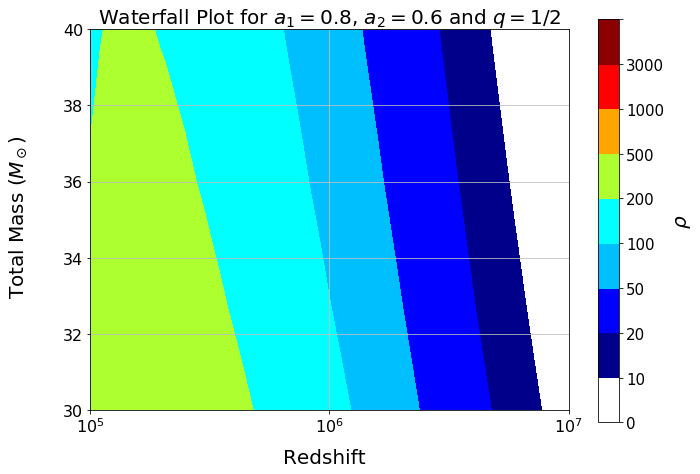

In [6]:
fig, ax = plot_main(waterfall, return_fig_ax=True)
ax[0].set_title('Waterfall Plot for $a_1=0.8$, $a_2=0.6$ and $q=1/2$', fontsize=20)
ax[0].set_xlim(5,7)
ax[0].set_ylim(30,40)
ax[0].set_yticks([30,32,34,36,38,40])
ax[0].set_yticklabels([30,32,34,36,38,40])

# Example 2

Generate Data for Plot 2: generate a 200x200 grid of mass ratio [$10^{-4}$, 1] and source frame total mass [$10^2M_\odot$, $10^8M_\odot$] for ringdown waveforms. Fix the redshift to 2. Use the same spin for both black holes (0.0). This plot will need two sensitivity curves. We will use the Proposed LISA sensitivity, and Classic LISA from Larson et al 2000. The Hils-Bender Galactic background is used. We will output to an hdf5 file. It will run in parallel.

We can decrease the start time and number of points comprising the waveform because we only want ringdown.

In [7]:
generate_plot_2 = GenInput(print_input=True)

# REDO DICTIONARY
# main inputs
generate_plot_2.set_signal_type('rd')
generate_plot_2.set_generation_type(num_processors=2, verbose=10)
generate_plot_2.set_wd_noise(True)

# output_info
generate_plot_2.set_output_file('./example_data/plot_2_data.hdf5')
generate_plot_2.set_x_col_name('M_s')
generate_plot_2.set_y_col_name('q')

# add a note that there is no white dwarf noise
generate_plot_2.add_note("Hils-Bender WD Background.")

# input sensitivity info
generate_plot_2.add_noise_curve('PL', noise_type='ASD')
generate_plot_2.add_noise_curve('CL', noise_type='ASD')
generate_plot_2.add_noise_curve('HB_wd_noise', noise_type='ASD', is_wd_background=True)


# generation info
generate_plot_2.set_x_grid_info(1e2, 1e8, 200, 'log', 'total_mass')
generate_plot_2.set_y_grid_info(1e-4, 1e0, 200, 'log', 'mass_ratio')

generate_plot_2.add_fixed_parameter(2.0, 'redshift')
generate_plot_2.add_fixed_parameter(0.0, 'spin_1')
generate_plot_2.add_fixed_parameter(0.0, 'spin_2')

# start time just needs to be long enough to get the ringdown.
generate_plot_2.add_fixed_parameter(0.1, 'start_time')
generate_plot_2.add_fixed_parameter(0.0, 'end_time')

# add LISA averaging factor
generate_plot_2.set_snr_prefactor(np.sqrt(2.*16./5.))

# we can also decrease number of points in the waveform for efficiency
# since we only want the ringdown
generate_plot_2.set_num_waveform_points(1024)


generate_contour_data(generate_plot_2)

{'sensitivity_input': {'sensitivity_curves': ['PL', 'CL'], 'noise_type_in': ['ASD', 'ASD'], 'add_wd_noise': 'True', 'wd_noise': 'HB_wd_noise', 'wd_noise_type_in': 'ASD'}, 'snr_input': {'prefactor': 2.5298221281347035, 'signal_type': ['rd'], 'num_points': 1024}, 'output_info': {'y_col_name': 'q', 'added_note': 'Hils-Bender WD Background.', 'output_file_name': './example_data/plot_2_data.hdf5', 'x_col_name': 'M_s'}, 'generate_info': {'num_y': 200, 'x_high': 100000000.0, 'y_low': 0.0001, 'yscale': 'log', 'spin_1': 0.0, 'yval_name': 'mass_ratio', 'redshift': 2.0, 'y_high': 1.0, 'start_time': 0.1, 'xscale': 'log', 'x_low': 100.0, 'end_time': 0.0, 'xval_name': 'total_mass', 'num_x': 200, 'spin_2': 0.0}, 'general': {}, 'parallel_input': {'verbose': 10, 'num_processors': 2, 'num_splits': 1000}}
start pool with 2 processors: 40 total processes.

Process  10 is finished.
Process  20 is finished.
Process  30 is finished.
Process  40 is finished.
outputing file: ././example_data/plot_2_data.hdf5
8

## Ratio Difference and Loss/Gain Contours

Ratio plots show the ratio of the SNR from one dataset to another ($\rho_1/\rho_2$).The first dataset is inputed as $\rho_1$. It is then compared against the "control", $\rho_2$. The loss (gain) contours refer to sources from the first dataset with an SNR above (below) a certain value, while the second dataset has an SNR below (above) that same value. This value can be set as the "SNR_CUT" variable, or specifically for the plot of interest with the "snr_contour_value" option. Horizontal and vertical ('+') hatching across a solid black outlined contour indicate gained sources while cross ('x') hatching across a dashed black outlined contour indicate lost sources (this is an update in the new version). See the paper for more detailed explanation of this construction.

{'plot_info': {'0': {'control': {'label': 'PL_wd_rd'}, 'extra': {}, 'legend': {'add_legend': True, 'legend_labels': None, 'legend_kwargs': {'loc': 'lower left', 'prop': {'size': 18}}}, 'plot_type': 'Ratio', 'label': {'title': 'Source Frame Total Mass vs. Mass Ratio', 'title_kwargs': {'fontsize': 18}}, 'limits': {}, 'file': [{'label': 'CL_wd_rd'}]}}, 'general': {'dx': 1.0, 'y_tick_label_fontsize': 16, 'yscale': 'log', 'num_rows': 1, 'num_cols': 1, 'xscale': 'log', 'ylims': [2.0, 8.0], 'y_column_label': 'M_s', 'x_tick_label_fontsize': 16, 'sharex': True, 'x_column_label': 'q', 'xlims': [-4.0, 0.0], 'sharey': True, 'dy': 1.0, 'file_name': 'plot_2_data.hdf5', 'WORKING_DIRECTORY': 'example_data'}, 'figure': {'fig_y_label': 'Total Mass ($M_\\odot$)', 'fig_y_label_x': 0.45, 'fig_y_label_y': 0.02, 'fig_x_label_x': 0.01, 'fig_x_label': 'Mass Ratio', 'fig_x_label_y': 0.51, 'figure_height': 7.0, 'figure_width': 10.0, 'fig_y_label_kwargs': {'rotation': 'horizontal', 'fontsize': 20, 'ha': 'center'}

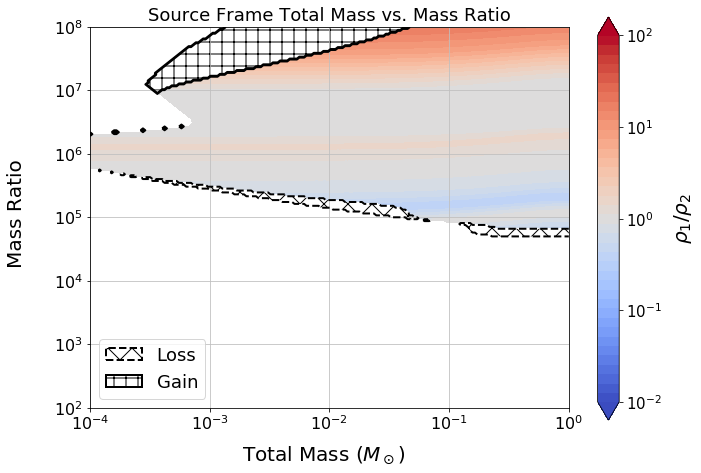

In [2]:
ratio = PlotInput(1, 1, print_input=True)

# set general info
ratio.set_working_directory("example_data")
ratio.set_all_file_column_labels(ylabel='M_s', xlabel='q')
ratio.set_fig_size(10.0, 7.0)
ratio.set_all_ylims([2.0, 8.0], 1.0, 'log', fontsize=16)
ratio.set_all_xlims([-4.0, 0.0], 1.0, 'log', fontsize=16)
ratio.set_fig_x_label(xlabel="Mass Ratio")
ratio.set_fig_y_label(ylabel=r"Total Mass ($M_\odot$)")
ratio.set_all_file_name("plot_2_data.hdf5")

# set plot_info
ratio.ax.set_plot_type('Ratio')

#We 
ratio.ax.add_dataset(label="PL_wd_rd", control=True)
ratio.ax.add_dataset(label="CL_wd_rd")
ratio.ax.add_legend(loc='lower left', size=18)

ratio.ax.set_title("Source Frame Total Mass vs. Mass Ratio", fontsize=18)

plot_main(ratio)

# Example 3

Generate Data for Plot 3: generate a 150x200 grid of total mass [$10^{1}M_\odot$, $10^{4}M_\odot$] and luminosity distance [$10^0$ Mpc, $10^5$ Mpc] for the inpiral phase (for these binaries, the only signal for LISA will be inspiral). Fix spins to 0.8. Rather than sensitivity curves, we will compare four values of mass ratio [1.0, 0.7, 0.4, 0.1]. For these binaries, we want earlier evolutions. Therefore, the start time will be 20 years before merger and an end time of 15 years before merger ($T_\text{obs}=5$years). This plot will need one sensitivity curve. We will use the newest LISA curve proposed for LISA Phase A (LPA) without Galactic background noise. We will output to an hdf5 file.

In [6]:
generate_plot_3 = GenInput(print_input=True)

# REDO DICTIONARY
# main inputs
generate_plot_3.set_signal_type('ins')
generate_plot_3.set_generation_type(num_processors=-1, verbose=20)
generate_plot_3.set_wd_noise(False)

# output_info
generate_plot_3.set_x_col_name('M_s')
generate_plot_3.set_y_col_name('d_L')

# input sensitivity info
generate_plot_3.add_noise_curve('PL', noise_type='ASD')

# generation info
generate_plot_3.set_x_grid_info(1e1, 1e4, 150, 'log', 'total_mass', 'SolarMasses')
generate_plot_3.set_y_grid_info(1e0, 1e5, 200, 'log', 'luminosity_distance', 'Mpc')

generate_plot_3.add_fixed_parameter(2, 0.8, 'spin_1', 'None')
generate_plot_3.add_fixed_parameter(3, 0.8, 'spin_2', 'None')

# start time just needs to be long enough to get the ringdown.
generate_plot_3.add_fixed_parameter(4, 20.0, 'start_time', 'Years')
generate_plot_3.add_fixed_parameter(5, 10.0, 'end_time', 'Years')

# add LISA averaging factor
generate_plot_3.set_snr_prefactor(np.sqrt(2.*16./5.))

mass_ratios = [1.0, 0.7, 0.4, 0.1]

for q in mass_ratios:
    generate_plot_3.add_fixed_parameter(1, q, 'mass_ratio', 'None')
    generate_plot_3.set_output_file('./example_data/plot_3_data_%02d.hdf5'%(10*q))
    generate_contour_data(generate_plot_3)

{'snr_input': {'prefactor': 2.5298221281347035, 'signal_type': ['ins']}, 'general': {}, 'generate_info': {'num_y': 200, 'x_low': 10.0, 'par_3_unit': 'None', 'par_5_unit': 'Years', 'xscale': 'log', 'par_2_name': 'spin_1', 'num_x': 150, 'xval_name': 'total_mass', 'yscale': 'log', 'par_4_name': 'start_time', 'par_3_name': 'spin_2', 'par_2_unit': 'None', 'par_1_unit': 'None', 'par_1_name': 'mass_ratio', 'yval_unit': 'Mpc', 'fixed_parameter_1': 1.0, 'xval_unit': 'SolarMasses', 'fixed_parameter_5': 10.0, 'par_5_name': 'end_time', 'par_4_unit': 'Years', 'fixed_parameter_3': 0.8, 'fixed_parameter_2': 0.8, 'x_high': 10000.0, 'y_low': 1.0, 'y_high': 100000.0, 'yval_name': 'luminosity_distance', 'fixed_parameter_4': 20.0}, 'parallel_input': {'num_splits': 1000, 'num_processors': -1, 'verbose': 20}, 'sensitivity_input': {'add_wd_noise': 'False', 'sensitivity_curves': ['PL'], 'noise_type_in': ['ASD']}, 'output_info': {'output_file_name': './example_data/plot_3_data_10.hdf5', 'x_col_name': 'M_s', 'y

## Horizon Plot

Horizon plots are helpful for comparing more than two configurations. They show contour lines at either "SNR_CUT" or a specified value with "snr_contour_value." 

{'plot_info': {'0': {'extra': {}, 'legend': {'add_legend': True, 'legend_labels': ['$q$=1', '$q$=0.7', '$q$=0.4', '$q$=0.1'], 'legend_kwargs': {'ncol': 2, 'loc': 'center right', 'prop': {'size': 16}}}, 'plot_type': 'Horizon', 'label': {'title': 'Mass Ratio Comparisons', 'title_kwargs': {'fontsize': 18}}, 'limits': {}, 'file': [{'file_name': 'plot_3_data_10.hdf5', 'label': 'PL_ins'}, {'file_name': 'plot_3_data_07.hdf5', 'label': 'PL_ins'}, {'file_name': 'plot_3_data_04.hdf5', 'label': 'PL_ins'}, {'file_name': 'plot_3_data_01.hdf5', 'label': 'PL_ins'}]}}, 'general': {'dx': 1.0, 'yscale': 'log', 'xlims': [1.0, 4.0], 'num_cols': 1, 'xscale': 'log', 'ylims': [0.0, 5.0], 'y_column_label': 'd_L', 'x_tick_label_fontsize': 16, 'sharex': True, 'x_column_label': 'M_s', 'num_rows': 1, 'sharey': True, 'dy': 1.0, 'y_tick_label_fontsize': 16, 'WORKING_DIRECTORY': 'example_data'}, 'figure': {'fig_y_label': 'Luminosity Distance (Mpc)', 'fig_y_label_x': 0.45, 'fig_y_label_y': 0.02, 'fig_x_label_x': 0.01

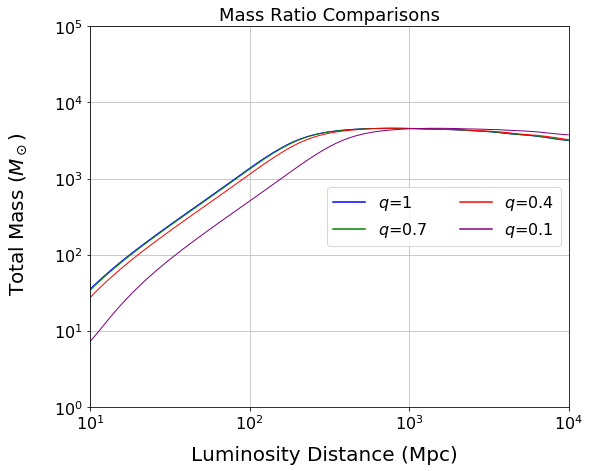

In [3]:
mass_ratios = [1.0, 0.7, 0.4, 0.1]

horizon = PlotInput(1, 1, print_input=True)

# set general info
horizon.set_working_directory("example_data")
horizon.set_all_file_column_labels(xlabel='M_s', ylabel='d_L')
horizon.set_fig_size(10.0, 7.0)
horizon.set_all_xlims([1.0, 4.0], 1.0, 'log', fontsize=16)
horizon.set_all_ylims([0.0, 5.0], 1.0, 'log', fontsize=16)
horizon.set_fig_x_label(xlabel=r"Total Mass ($M_\odot$)")
horizon.set_fig_y_label(ylabel="Luminosity Distance (Mpc)")



# set plot_info
horizon.ax.set_plot_type('Horizon')

for q in mass_ratios:
    horizon.ax.add_dataset(name='plot_3_data_%02d.hdf5'%(10*q), label="PL_ins")
    
horizon.ax.add_legend([r'$q$=%.1g'%q for q in mass_ratios], loc='center right', size=16, ncol=2)
    
horizon.ax.set_title("Mass Ratio Comparisons", fontsize=18)

plot_main(horizon)